In [12]:
import graph_importer as gim

import polars as pl
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
G = gim.make_graph("./concordant_networks/temponet_14_365.lgl")

In [7]:
edge_info = [
    {
        'weight': edge['weight'],
        'source_time': edge.source_vertex['time'],
        'target_time': edge.target_vertex['time'],
        'source_loc': edge.source_vertex['loc'],
        'target_loc': edge.target_vertex['loc'],
    }
    for edge in G.es
]

In [8]:
edge_df = pl.from_dicts(edge_info)

In [16]:
collated_departures = edge_df.group_by('source_loc', 'source_time').agg(weight=pl.col('weight').sum(), period=14/pl.col('weight').sum())

<Axes: xlabel='source_time', ylabel='weight'>

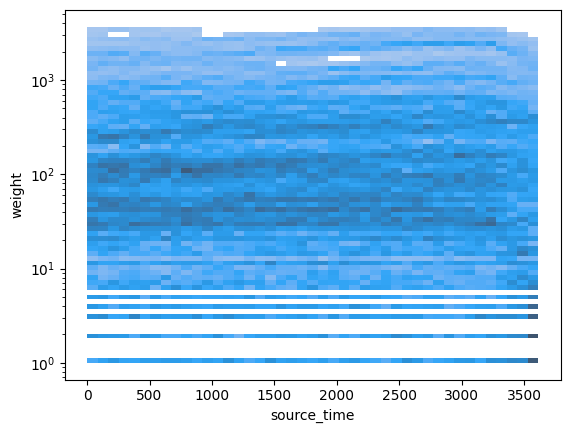

In [27]:
sns.histplot(
    (collated_departures
     # .filter(pl.col('source_time').mod(14*10).eq(0)) # get every 10th entry
     ),
    x='source_time',
    y='weight',
    log_scale=(False, True),
)